### import data

x = features
y = lables

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import os
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [21]:
# Folder path containing CSV files
folder_path = r'C:\Users\Asus\Desktop\PG Project\Legend\vehicles\Code and Dataset\Drive cycle dataset seprately\HWFET'

# Empty list to store data from all CSV files
data_frames = []


In [22]:
# Loop through all CSV files in the folder and append to data_frames list
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        filepath = os.path.join(folder_path, filename)
        df = pd.read_csv(filepath)
        data_frames.append(df)

In [23]:
# Concatenate all data frames into a single data frame
df = pd.concat(data_frames)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3229857 entries, 0 to 46762
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Voltage      float64
 1   Current      float64
 2   Temperature  float64
 3   Capacity     float64
 4   WhAccu       float64
 5   Cnt          int64  
dtypes: float64(5), int64(1)
memory usage: 172.5 MB


In [25]:
df = df.astype('float32')

In [26]:
# Mean normalization
mean = df.mean()
std = df.std()
df = (df - mean) / std

In [27]:
print(df.describe())

            Voltage       Current   Temperature      Capacity        WhAccu  \
count  3.229857e+06  3.229857e+06  3.229857e+06  3.229857e+06  3.229857e+06   
mean  -2.611300e-02 -1.507330e-03  4.841414e-03 -5.962741e-03 -1.982045e-03   
std    9.994985e-01  1.002197e+00  9.967606e-01  1.001029e+00  9.993753e-01   
min   -3.016244e+00 -7.026531e+00 -1.628360e+00 -2.172547e+00 -2.148141e+00   
25%   -7.248806e-01 -4.728448e-01 -9.083449e-01 -7.721563e-01 -7.812516e-01   
50%   -1.780578e-02  2.905660e-01  1.116772e-01 -4.683716e-02 -6.315909e-02   
75%    7.713354e-01  4.867221e-01  9.576960e-01  8.931137e-01  8.827344e-01   
max    1.937714e+00  2.979499e+00  1.881716e+00  5.230404e+00  5.634620e+00   

                Cnt  
count  3.229857e+06  
mean  -4.725012e-03  
std    9.992207e-01  
min   -6.150973e-01  
25%   -4.627537e-01  
50%   -1.580666e-01  
75%    1.466206e-01  
max    6.088020e+00  


In [28]:
df.fillna(df.mean(), inplace=True)

In [29]:
max_discharge = abs(min(df["Capacity"])) 
df["SoC Capacity"] = max_discharge + df["Capacity"]
df["SoC Percentage"] = df["SoC Capacity"] / max(df["SoC Capacity"])

1. **max_discharge = abs(min(df["Capacity"]))** This line is calculating the maximum discharge of the battery. It does this by finding the minimum capacity value in the "Capacity" column of the dataframe, taking the absolute value of it (since it's negative), and assigning it to the variable max_discharge.

2. **df["SoC Capacity"] = max_discharge + df["Capacity"]** This line is creating a new column in the dataframe called "SoC Capacity". It does this by adding max_discharge (which we calculated in step 1) to the "Capacity" column of the dataframe. The result is a new column that represents the total capacity of the battery when it is fully charged (since the maximum discharge has been added to the original capacity).

3.**df["SoC Percentage"] = df["SoC Capacity"] / max(df["SoC Capacity"])** This line is creating another new column in the dataframe called "SoC Percentage". It does this by dividing the "SoC Capacity" column by the maximum value in the "SoC Capacity" column. The result is a new column that represents the percentage of the battery's full capacity that is currently available (i.e. the State of Charge or SoC).

So, in summary, the code is calculating the SoC Capacity and Percentage for a battery, based on the maximum discharge and current capacity values in the dataframe.

In [30]:
x = df[["Voltage", "Current", "Temperature"]].to_numpy()
y = df[["SoC Percentage"]].to_numpy()

# Capacity
The typical capcity of this battery is **2784mAh**. This function converts the **Ah** measurement into a relative capacity by determining the capacity lost from the battery and dividing this by the known maximum capacity of the battery.

In [ ]:
df['Capacity'] = 1 - (-df['Ah'] / 2.784)

In [15]:
x = df[["Voltage(V)", "Current(A)", "Temp"]].to_numpy()
y = df[["SOC"]].to_numpy()

### Linear regression

In [30]:
# Splitting the dataset into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=500)

In [31]:
# Creating a Linear Regression model and fitting it on the training data
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(train_x, train_y)

LinearRegression()

In [32]:
# Predicting the target variable for the testing set using the trained Linear Regression model
predicted_target_lr = lr_model.predict(test_x)

In [33]:
# Calculating the Mean Absolute Error (MAE) between the predicted and actual target values
mae = mean_absolute_error(test_y, predicted_target_lr)
print('Mean Absolute Error (MAE):', mae*100)
rmse = np.sqrt(mean_squared_error(test_y, predicted_target_lr))
print('Root Mean Square Error (RMSE):', rmse*100)

Mean Absolute Error (MAE): 3.8610191794685402
Root Mean Square Error (RMSE): 5.28733565823349


#### CNN

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers

In [31]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df[["Voltage", "Current", "Temperature"]].to_numpy(), df[["SoC Percentage"]].to_numpy(), test_size=0.2)

In [32]:
# Reshape the input data to 3D array (number of samples, number of time steps, number of features)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [33]:
# Define the 1D CNN model
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=(3, 1)))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(Dense(1, activation='linear', kernel_regularizer=regularizers.l2(0.1)))

In [34]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [35]:
# Train the model
history = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/25
80747/80747 [==============================] - 349s 4ms/step - loss: 0.0131 - mae: 0.0747 - val_loss: 0.0074 - val_mae: 0.0598
Epoch 2/25
80747/80747 [==============================] - 336s 4ms/step - loss: 0.0063 - mae: 0.0518 - val_loss: 0.0059 - val_mae: 0.0495
Epoch 3/25
80747/80747 [==============================] - 338s 4ms/step - loss: 0.0057 - mae: 0.0491 - val_loss: 0.0055 - val_mae: 0.0484
Epoch 4/25
80747/80747 [==============================] - 340s 4ms/step - loss: 0.0054 - mae: 0.0480 - val_loss: 0.0051 - val_mae: 0.0465
Epoch 5/25
80747/80747 [==============================] - 337s 4ms/step - loss: 0.0053 - mae: 0.0471 - val_loss: 0.0055 - val_mae: 0.0482
Epoch 6/25
80747/80747 [==============================] - 335s 4ms/step - loss: 0.0052 - mae: 0.0463 - val_loss: 0.0048 - val_mae: 0.0435
Epoch 7/25
80747/80747 [==============================] - 336s 4ms/step - loss: 0.0051 - mae: 0.0458 - val_loss: 0.0047 - val_mae: 0.0428
Epoch 8/25
80747/80747 [==========

In [36]:
# Make predictions on test set
y_pred = model.predict(x_test)

20187/20187 [==============================] - 32s 2ms/step


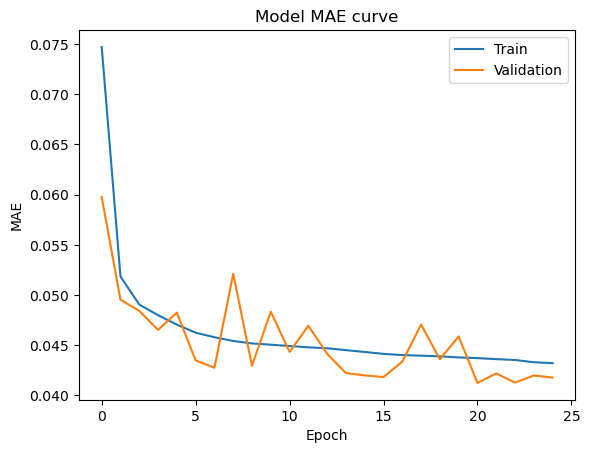

In [37]:
# Plot train and validation accuracy curves
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE curve')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

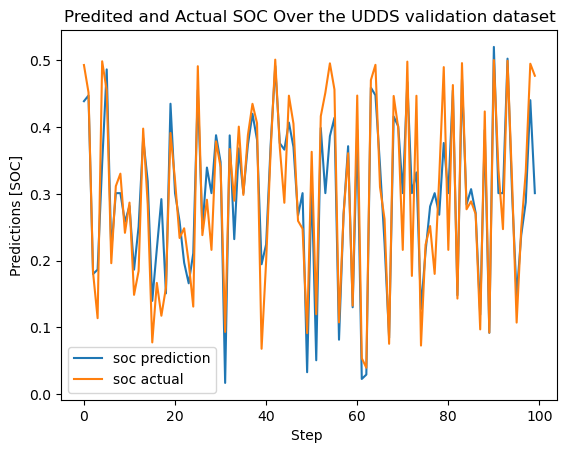

In [38]:
# Plot predicted SoC and actual SoC curve
plt.xlabel('Step ')
plt.ylabel('Predictions [SOC]')
plt.plot(y_pred[:100], label='soc prediction')
plt.plot(y_test[:100], label='soc actual')
plt.legend()
plt.title('Predited and Actual SOC Over the UDDS validation dataset')
plt.savefig(r"C:\Users\Asus\Desktop\HWFET.png", dpi=600)

In [ ]:
# Calculate performance metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print performance metrics
print("R2 score:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


In [8]:
# Min-max normalization
df = (df - df.min()) / (df.max() - df.min())

#another type of nomrmalisation